# Purpose

The purpose of this project is to demonstrate the ability to analyze a dataset prior to conducting a machine learning model.<br>
<br>
**What to expect:**<br>
Loading data<br>
Missing value analysis<br>
Unique data analysis<br>
Visualizing the data<br>
Outlier analysis<br>


At the end there will be some machine learning modeling with classifiers using scaled and unscaled data<br>
It is noted that there is an imbalance between target classes which impacts the predictibility of machine learning models

## Pima Indians Dataset

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years.<br>
The different features in the dataset are Pregnancies, Plasma glucose, Blood pressure, Skin thickness, Insulin test, BMI(Body Mass Index), Diabetes pedigree, Age, and Outcome class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import itertools

### Loading Data

In [2]:
df1 = pd.read_csv('C:\\Users\\JB\\PracPythonCoding\\Full Stack Data Scientist Bootcamp\\02 Python Dataset\\datasets\\pima-indians-diabetes.csv')

In [3]:
df1.columns = ['Preg', 'Glucose', 'BP', 'ST', 'Insulin','BMI','Dpedi','Age','tgtclass']
df1.head()

,Preg,Glucose,BP,ST,Insulin,BMI,Dpedi,Age,tgtclass
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data information (data types, column names, data shape and non-null values)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Preg      768 non-null    int64  
 1   Glucose   768 non-null    int64  
 2   BP        768 non-null    int64  
 3   ST        768 non-null    int64  
 4   Insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   Dpedi     768 non-null    float64
 7   Age       768 non-null    int64  
 8   tgtclass  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Null Data Analysis

In [5]:
df1.isnull().sum()

Preg        0
Glucose     0
BP          0
ST          0
Insulin     0
BMI         0
Dpedi       0
Age         0
tgtclass    0
dtype: int64

### Unique Values Analysis

In [6]:
col = df1.columns

for i in col:
    if len(df1[i].unique()) < 18:
        print('Unique values in column **',i,'** are:',df1[i].unique())
        print('The number of unique values in column **',i,'** are:',len(df1[i].unique()))
        print('')
    else:
        print('The number of unique values in column **',i,'** are:',len(df1[i].unique()))
        print('')

Unique values in column ** Preg ** are: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
The number of unique values in column ** Preg ** are: 17

The number of unique values in column ** Glucose ** are: 136

The number of unique values in column ** BP ** are: 47

The number of unique values in column ** ST ** are: 51

The number of unique values in column ** Insulin ** are: 186

The number of unique values in column ** BMI ** are: 248

The number of unique values in column ** Dpedi ** are: 517

The number of unique values in column ** Age ** are: 52

Unique values in column ** tgtclass ** are: [1 0]
The number of unique values in column ** tgtclass ** are: 2



### Descriptive Statistics

In [7]:
df1.describe()

,Preg,Glucose,BP,ST,Insulin,BMI,Dpedi,Age,tgtclass
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Target/Dependent Variable Analysis

In [8]:
df1['tgtclass'].value_counts()

0    500
1    268
Name: tgtclass, dtype: int64

**Note there is an unbalance of target values.  Building a ML model with this biases will produce unreliable results**

# EDA and Visualization

### Correlation

In [9]:
df1.corr()

,Preg,Glucose,BP,ST,Insulin,BMI,Dpedi,Age,tgtclass
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
ST,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Dpedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
tgtclass,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

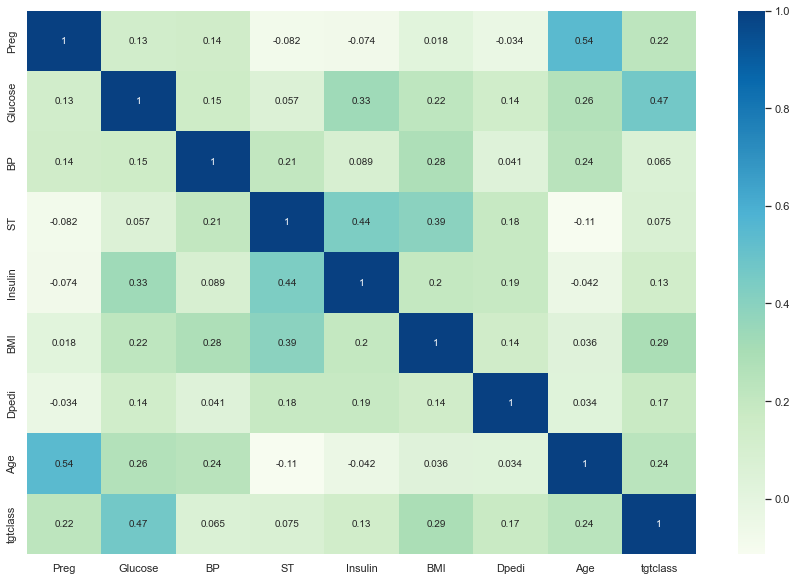

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df1.corr(), annot=True, cmap='GnBu')

### Distributions

#### Skewness

In [11]:
df1.skew()

Preg        0.901674
Glucose     0.173754
BP         -1.843608
ST          0.109372
Insulin     2.272251
BMI        -0.428982
Dpedi       1.919911
Age         1.129597
tgtclass    0.635017
dtype: float64

array([[<AxesSubplot:title={'center':'Preg'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BP'}>],
       [<AxesSubplot:title={'center':'ST'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Dpedi'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'tgtclass'}>]], dtype=object)

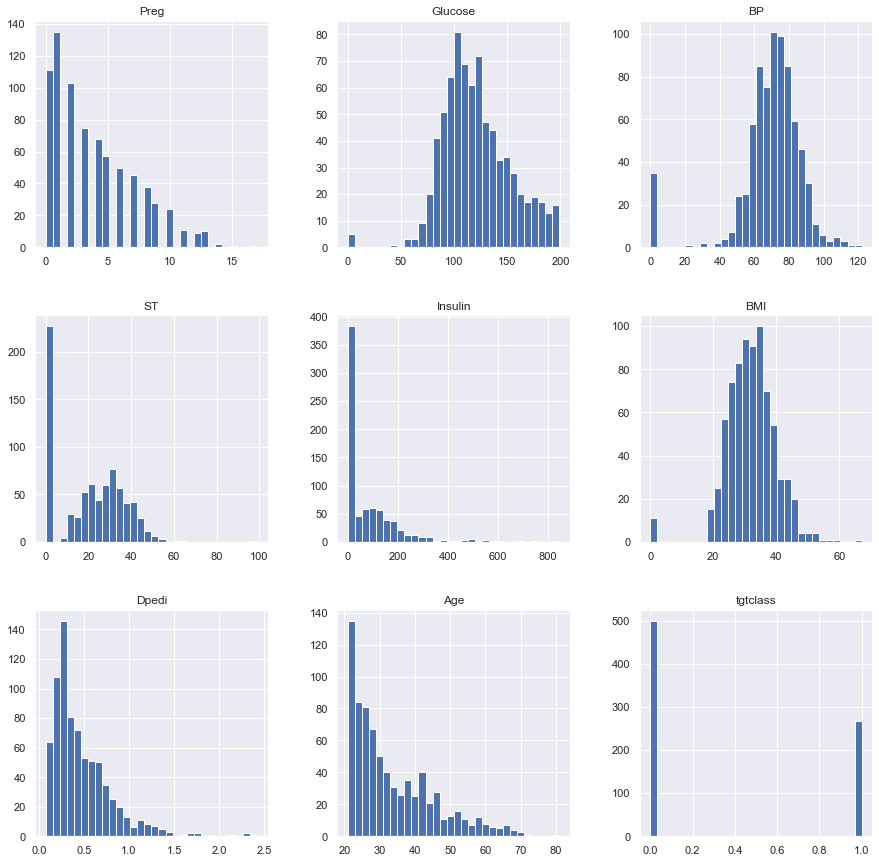

In [12]:
df1.hist(figsize=(15,15), bins=30)

### Pair Plots

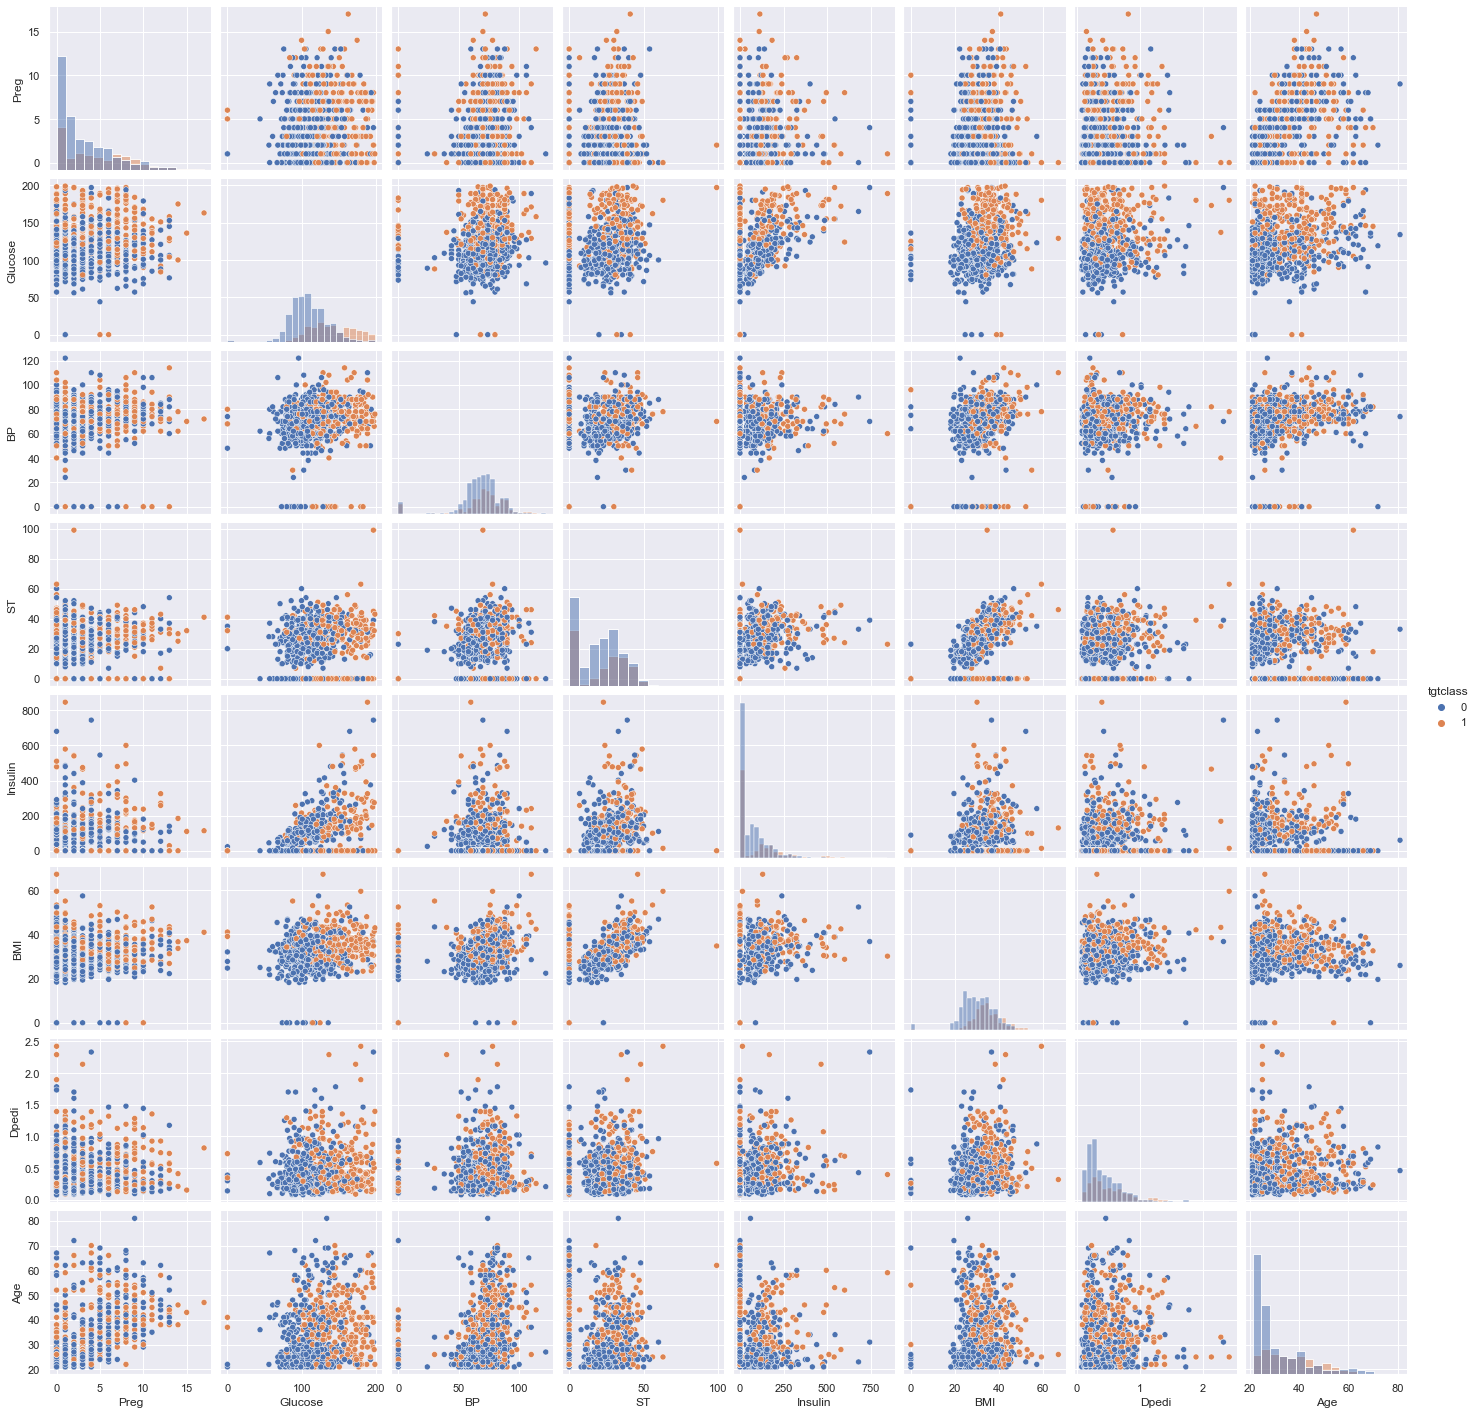

In [13]:
sns.pairplot(df1, diag_kind='hist', hue='tgtclass')

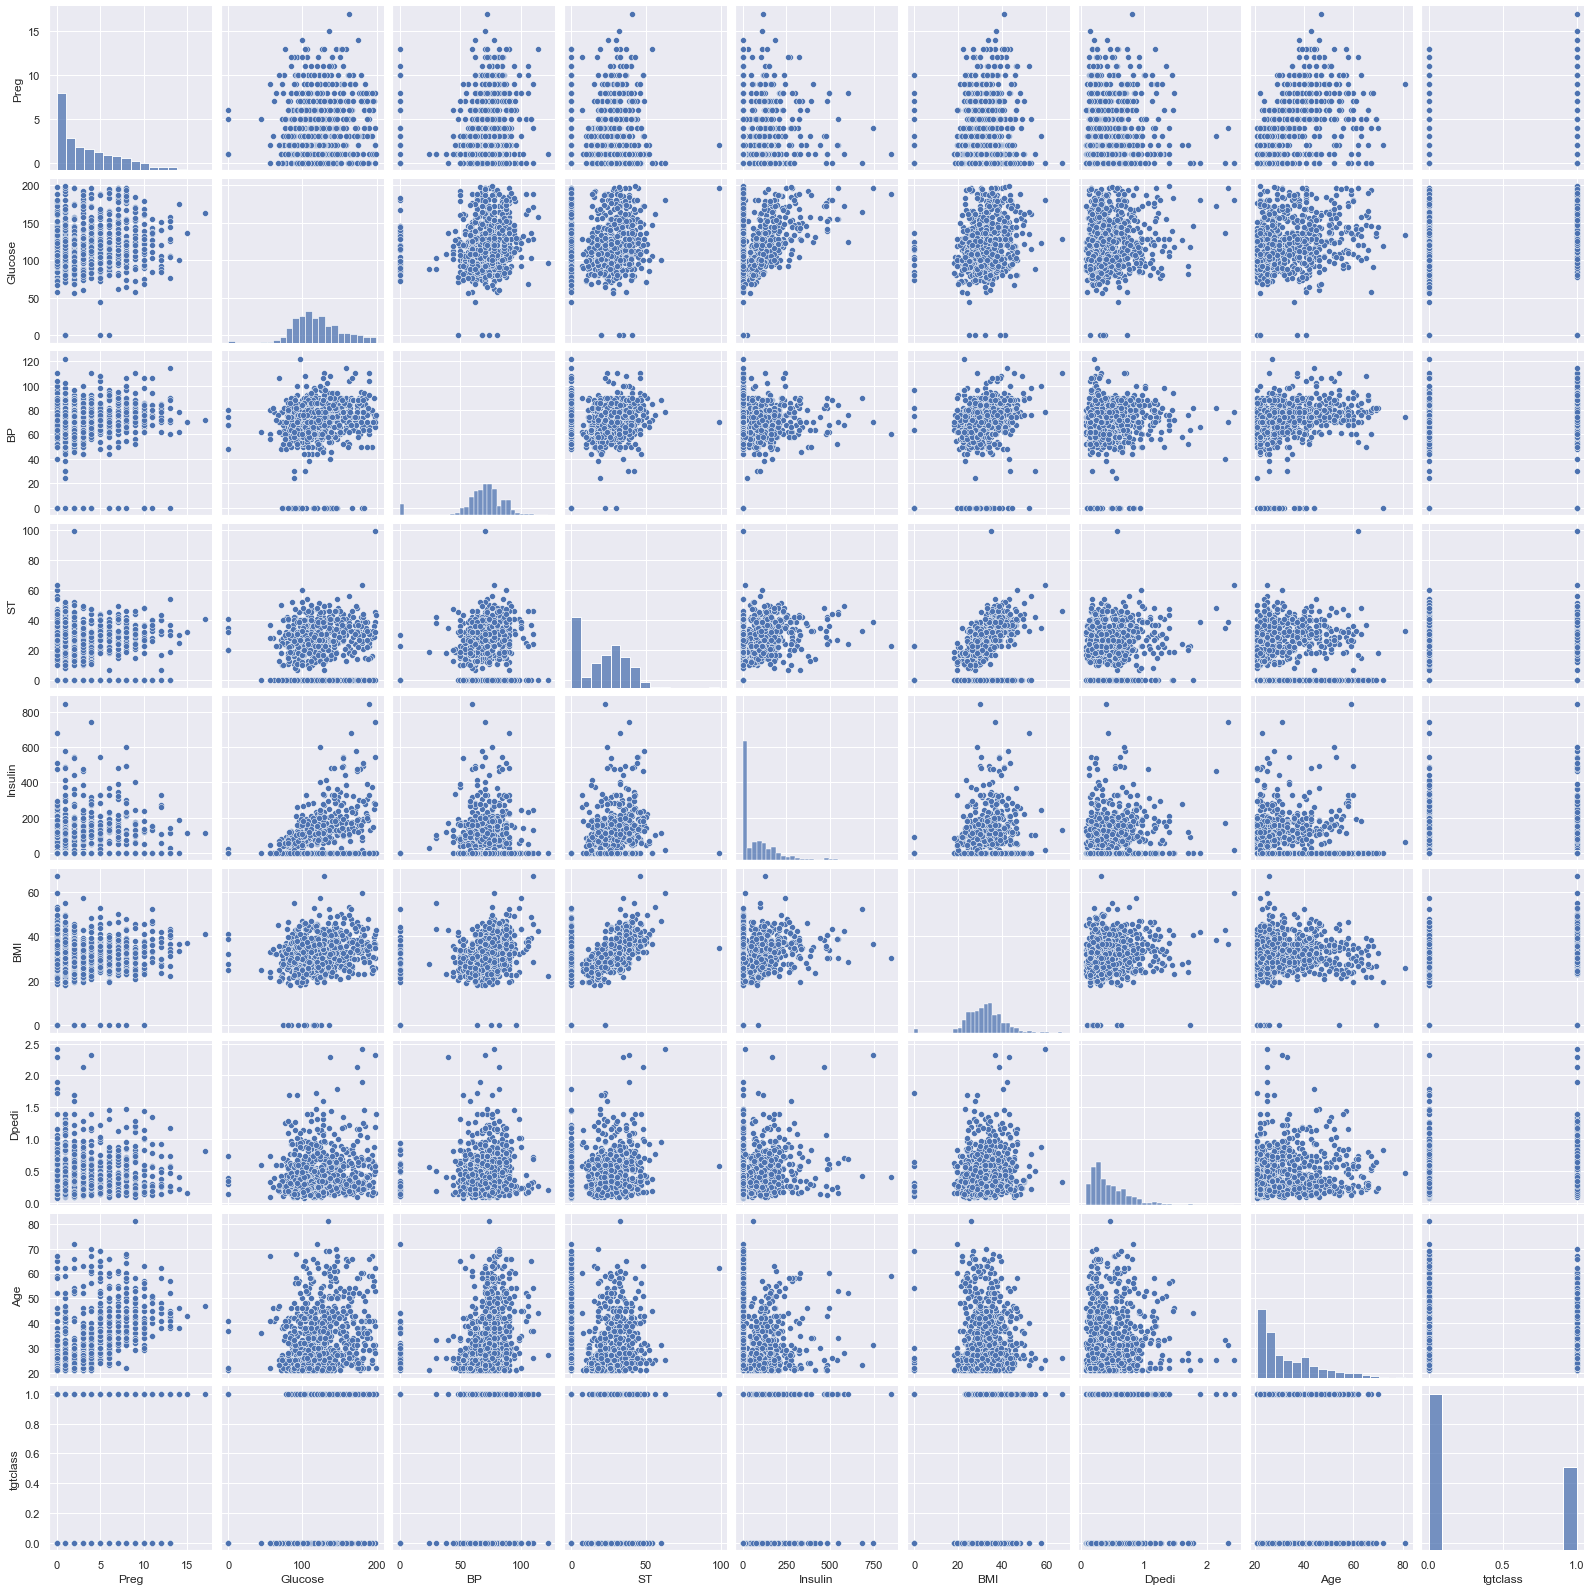

In [14]:
sns.pairplot(df1, diag_kind='hist')

# Outliers Analysis

Preg           AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BP          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
ST             AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Dpedi             AxesSubplot(0.125,0.125;0.227941x0.222059)
Age            AxesSubplot(0.398529,0.125;0.227941x0.222059)
tgtclass       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

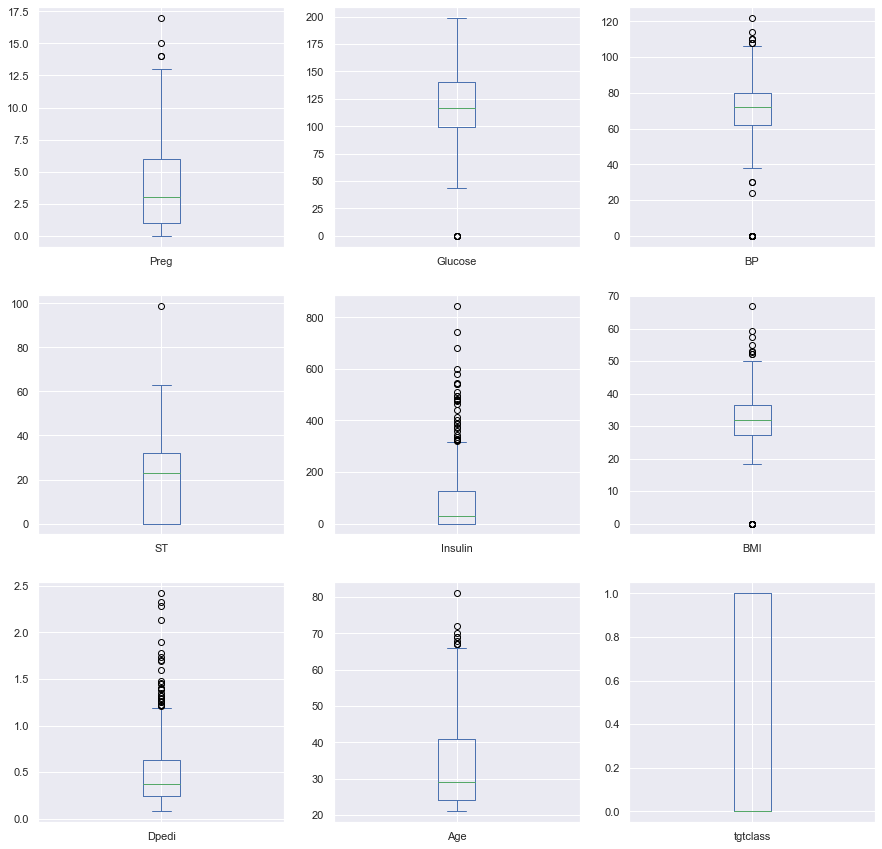

In [15]:
df1.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))

In [16]:
df1.describe()

,Preg,Glucose,BP,ST,Insulin,BMI,Dpedi,Age,tgtclass
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Outliers using the IRQ*1.5 method

In [17]:
col1 = ['Preg', 'Glucose', 'BP', 'ST', 'Insulin', 'BMI', 'Dpedi', 'Age']

In [18]:
for i in col1:
    x = np.percentile(df1[i],75)
    y = np.percentile(df1[i],25)
    z = (x-y)*1.5
    print('__________',i,'__________')
    print(df1[(df1[i]>(x+z)) | (df1[i]<(y-z))][i])
    print('_______________________________________________')

__________ Preg __________
88     15
159    17
298    14
455    14
Name: Preg, dtype: int64
_______________________________________________
__________ Glucose __________
75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64
_______________________________________________
__________ BP __________
7        0
15       0
18      30
43     110
49       0
60       0
78       0
81       0
84     108
106    122
125     30
172      0
177    110
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
362    108
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
549    110
589      0
597     24
601      0
604      0
619      0
643      0
691    114
697      0
703      0
706      0
Name: BP, dtype: int64
_______________________________________________
__________ ST __________
579    99
Name: ST, dtype: int64
_______________________________________________
__________ I

# Machine Learning Modeling

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Logistic Regression Scaled Data

In [21]:
from sklearn.linear_model import LogisticRegression

X = df1.drop(['tgtclass'], axis=1)
y = df1['tgtclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

log = LogisticRegression(max_iter=1000)
log.fit(X_train,y_train)

y_pred = log.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       148
           1       0.78      0.55      0.65        83

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231

[[135  13]
 [ 37  46]]


## Logistic Regression Unscaled Data

In [23]:
from sklearn.linear_model import LogisticRegression

X = df1.drop(['tgtclass'], axis=1)
y = df1['tgtclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       148
           1       0.78      0.55      0.65        83

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231

[[135  13]
 [ 37  46]]


## Random Forest Scaled Data

In [24]:
from sklearn.ensemble import RandomForestClassifier

X = df1.drop(['tgtclass'], axis=1)
y = df1['tgtclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rfc = RandomForestClassifier(max_depth=600)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       148
           1       0.77      0.64      0.70        83

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.80      0.80      0.80       231

[[132  16]
 [ 30  53]]


## RFC Unscaled Data

In [25]:
from sklearn.ensemble import RandomForestClassifier

X = df1.drop(['tgtclass'], axis=1)
y = df1['tgtclass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

rfc = RandomForestClassifier(max_depth=600)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       148
           1       0.74      0.61      0.67        83

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231

[[130  18]
 [ 32  51]]


## SVM Scaled Data

In [26]:
from sklearn.svm import SVC

X = df1.drop(['tgtclass'], axis=1)
y = df1['tgtclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svc = SVC()
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       148
           1       0.71      0.53      0.61        83

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231

[[130  18]
 [ 39  44]]


# SVM Unscaled Data

In [27]:
from sklearn.svm import SVC

X = df1.drop(['tgtclass'], axis=1)
y = df1['tgtclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

svc = SVC()
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       148
           1       0.79      0.46      0.58        83

    accuracy                           0.76       231
   macro avg       0.77      0.70      0.71       231
weighted avg       0.77      0.76      0.74       231

[[138  10]
 [ 45  38]]
